In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -uq "/content/drive/My Drive/FruitsDB" -d "/content"

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd

from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean

from sklearn.model_selection import train_test_split
from skimage import data, color, feature
from skimage.feature import hog

import glob

In [0]:
def load_data(fruit, tipo):
    label=[]
    arr = []
    strr = "FruitsDB/"+fruit+"/" + tipo + "/*"
    for file_ in glob.glob(strr):
      img = cv2.imread(file_)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      arr.append(img)
      label.append(fruit)
   
    return arr,label

In [0]:
def whole_train_data(tipo):
  apples_data, apples_label = load_data('Apples', tipo)
  mangoes_data, mangoes_label = load_data('Mangoes', tipo)
  oranges_data, oranges_label = load_data('Oranges', tipo)
  data =np.concatenate((apples_data,mangoes_data,oranges_data))
  labels =np.concatenate((apples_label, mangoes_label, oranges_label))
  return data, labels

In [0]:
data_train, labels_train = whole_train_data('Train')
data_test, labels_test = whole_train_data('Test')

In [8]:
data_train.shape, labels_train.shape

((220, 800, 1200, 3), (220,))

In [0]:
def preprocessing(arr):
    arr_prep=[]
    for i in range(arr.shape[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        img=resize(img, (72, 72),anti_aliasing=True)
        arr_prep.append(img)
    return arr_prep

In [0]:
data_train_p = preprocessing(data_train)
data_test_p = preprocessing(data_test)

In [12]:
type(data_train[0])

numpy.ndarray

In [0]:
def ExtractHOG(img):
    ftr,_=hog(img, orientations=8, pixels_per_cell=(16, 16),
            cells_per_block=(1, 1), visualize=True, multichannel=False)
    return ftr
  
def preprocessing_part_two(arr):
    arr_feature=[]
    for i in range(np.shape(arr)[0]):
        arr_feature.append(ExtractHOG(arr[i])) 
    return arr_feature

In [0]:
data_train_ftr = preprocessing_part_two(data_train_p)
data_test_ftr= preprocessing_part_two(data_test_p)

**KNN for clasification**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=11)
knn_clf.fit(data_train_ftr, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='distance')

In [0]:
y_knn_pred = knn_clf.predict(data_test_ftr)

In [17]:
print(accuracy_score(labels_test, y_knn_pred)*100,'%')

89.39393939393939 %


In [0]:
def showImg(img, name):
    plt.axis("off")
    plt.title(name)
    plt.imshow(img)
    plt.show()

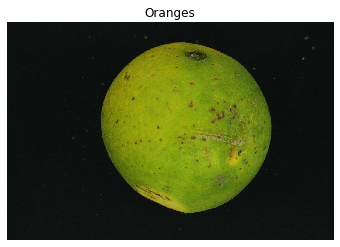

In [32]:
from random import seed
from random import randint
x_ = randint(0, data_test.shape[0])
showImg(data_test[x_], y_knn_pred[x_])